In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!#pip install typeguard

In [ ]:
import random
seeds = random.sample(range(0, 10000), 10)
seeds

[7138, 9626, 7046, 436, 2707, 9999, 8453, 327, 6684, 1001]

In [ ]:
seeds = [7138, 962, 704634, 436, 27, 9999, 8453, 327, 6684, 1001]

In [ ]:
from fastai import *
from fastai.vision import *
import random
bs = 32
random.seed(7138)

In [ ]:
%cd orig

/content/drive/My Drive/orig


In [ ]:
#!ls
!unzip 'data-balanced.zip'

Archive:  data-balanced.zip
   creating: data-balanced/
   creating: data-balanced/test/
   creating: data-balanced/test/Compact/
  inflating: data-balanced/test/Compact/J013426.53-081701.9.jpeg  
  inflating: data-balanced/test/Compact/J090130.14+553916.6.jpeg  
  inflating: data-balanced/test/Compact/J000001.58-092940.3.jpeg  
  inflating: data-balanced/test/Compact/J000027.89-010235.4.jpeg  
  inflating: data-balanced/test/Compact/J000140.36-010636.9.jpeg  
  inflating: data-balanced/test/Compact/J000134.96-085727.7.jpeg  
  inflating: data-balanced/test/Compact/J003055.39+001024.2.jpeg  
  inflating: data-balanced/test/Compact/J085651.78+214949.4.jpeg  
  inflating: data-balanced/test/Compact/J000400.88+001717.9.jpeg  
  inflating: data-balanced/test/Compact/J000140.21+010531.1.jpeg  
  inflating: data-balanced/test/Compact/J002235.86+003555.0.jpeg  
  inflating: data-balanced/test/Compact/J000325.23+004355.5.jpeg  
  inflating: data-balanced/test/Compact/J015301.50-010841.5.jpeg  

In [ ]:
!ls

data  data-balanced  data-balanced.zip	data-orig.zip


In [ ]:
path_img = Path('data-balanced')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FRII,FRII,FRII,FRII,FRII
Path: data-balanced;

Valid: LabelList (576 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FRII,FRII,FRII,FRII,FRII
Path: data-balanced;

Test: None

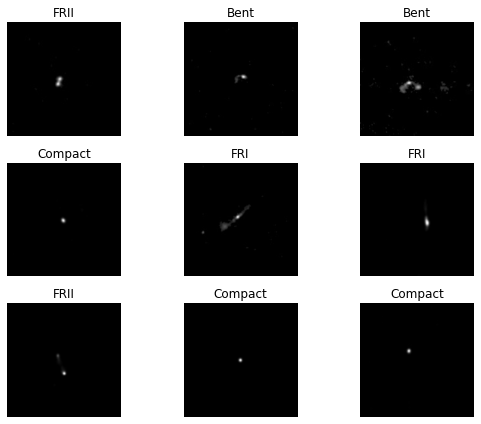

In [ ]:
data.show_batch(rows=3, figsize=(8,6))

In [ ]:
learn = cnn_learner(data, models.densenet161, metrics=accuracy)
learn.freeze()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


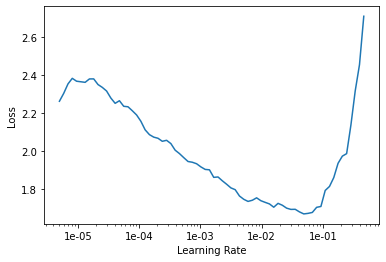

In [ ]:
# init 7138
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.166988,0.682565,0.706597,01:18


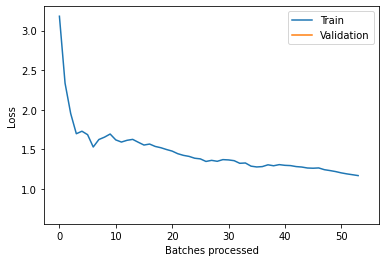

In [ ]:
# init 7138
learn.fit_one_cycle(1, max_lr=slice(3e-4,1e-2))
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


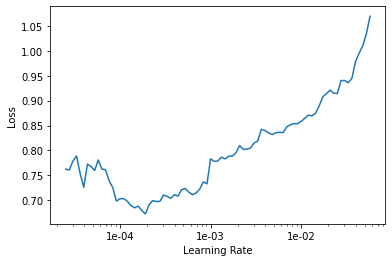

In [ ]:
# init 7138
learn.unfreeze()
learn.lr_find(start_lr=slice(1e-6, 1e-5), end_lr=slice(1e-2, 1e-1), wd=1e-3)
learn.recorder.plot()

In [ ]:
# init 7138
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-27), div_factor=50, final_div=100, wd=1e-4, moms=(0.9, 0.8))
learn.recorder.plot_losses()
# schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,0.819925,0.981112,0.678819,01:42
1,0.667621,0.809328,0.753472,01:42
2,0.546822,0.346555,0.876736,01:42
3,0.430168,0.444409,0.838542,01:42
4,0.357413,0.475157,0.826389,01:42
5,0.320679,0.364336,0.878472,01:42
6,0.266460,0.316564,0.868056,01:42
7,0.208995,0.296107,0.885417,01:42
8,0.177255,0.266819,0.904514,01:42
9,0.142940,0.239298,0.928819,01:42


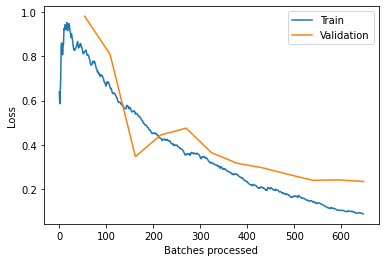

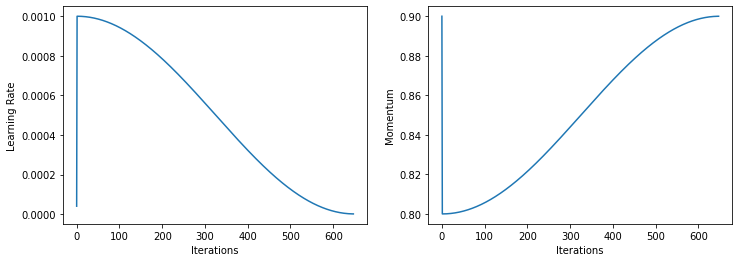

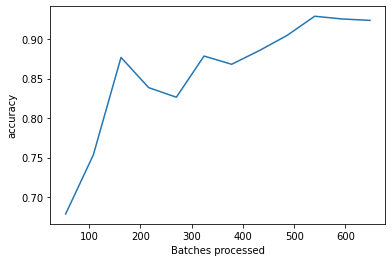

In [ ]:
# init 7138
learn.fit_one_cycle(cyc_len=12, max_lr=slice(9e-5, 1e-3), pct_start=0, final_div=1000, wd=1e-3, moms=(0.9, 0.8)) # warm restart: pct_start=0
#learn.save('stage-3')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [ ]:
learn.save('rg-balance-init-7138')

In [ ]:
learn.load('rg-balance-init-7138')
interp = ClassificationInterpretation.from_learner(learn)

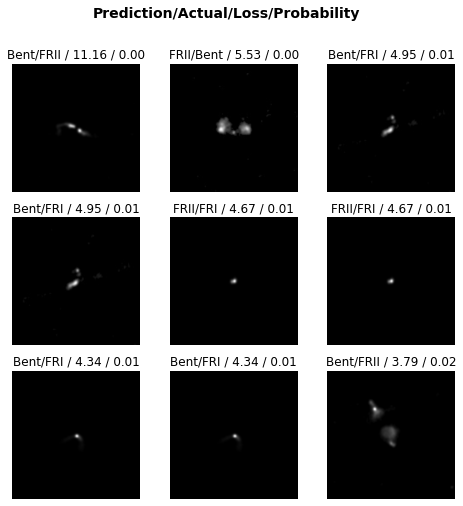

In [ ]:
interp.plot_top_losses(9, figsize=(8,8))

In [ ]:
losses, indexes = interp.top_losses(30)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data-balanced/valid/FRII/J151108.76+180153.2.jpeg')
 PosixPath('data-balanced/valid/Bent/J143448.92-021509.4.jpg')
 PosixPath('data-balanced/valid/FRI/J143521.30-024051.7 (copy).jpg')
 PosixPath('data-balanced/valid/FRI/J143521.30-024051.7.jpg')
 PosixPath('data-balanced/valid/FRI/J141104.33-030043.3 (copy).jpeg')
 PosixPath('data-balanced/valid/FRI/J141104.33-030043.3.jpeg')
 PosixPath('data-balanced/valid/FRI/J140313.27+061008.2 (copy).jpeg')
 PosixPath('data-balanced/valid/FRI/J140313.27+061008.2.jpeg')
 PosixPath('data-balanced/valid/FRII/J144919.01+210548.0.jpg')
 PosixPath('data-balanced/valid/Bent/J112501.69+091004.3.jpg')
 PosixPath('data-balanced/valid/Bent/J112501.69+091004.3 (copy).jpg')
 PosixPath('data-balanced/valid/FRII/J145752.77+111809.5.jpg')
 PosixPath('data-balanced/valid/FRII/J144808.61+163439.5.jpg')
 PosixPath('data-balanced/valid/Bent/J143505.58-040920.9.jpg')
 PosixPath('data-balanced/valid/FRII/J153004.69+290009.3.jpg')
 PosixPath('data-balanced/va

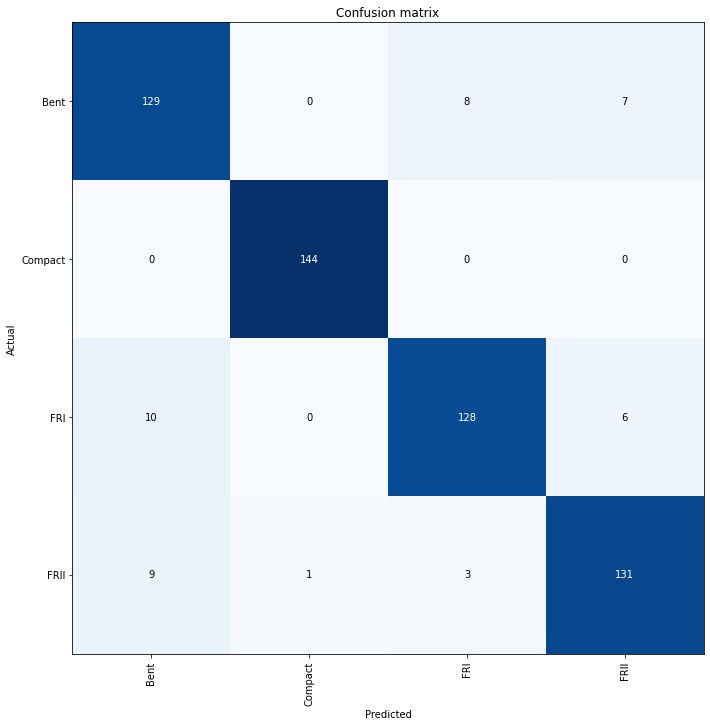

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
path_img = Path('data-balanced')## Loading data 
#data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', ds_tfms=get_transforms(),size=224, bs=bs), check_ext=False)## Normalizing data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='test', ds_tfms=get_transforms(),size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FRII,FRII,FRII,FRII,FRII
Path: data-balanced;

Valid: LabelList (404 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Compact,Compact,Compact,Compact,Compact
Path: data-balanced;

Test: None

In [ ]:
learn = cnn_learner(data, models.densenet161, metrics=[accuracy])


In [ ]:
learn = learn.load('rg-balance-init-7138')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

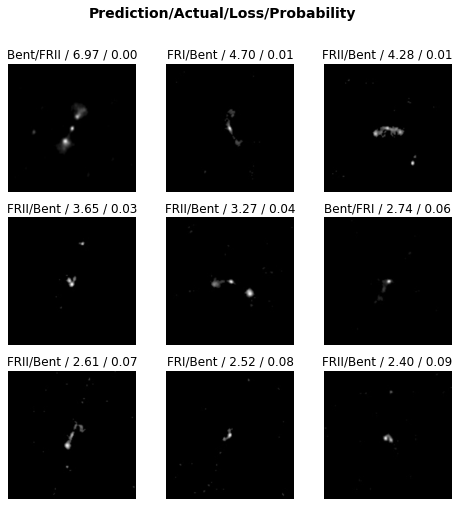

In [ ]:
interp.plot_top_losses(9, figsize=(8,8))

In [ ]:
losses, indexes = interp.top_losses(30)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('data-balanced/test/FRII/J004312.83-103956.1.jpeg')
 PosixPath('data-balanced/test/Bent/J102902.08+494417.5.jpeg')
 PosixPath('data-balanced/test/Bent/J114525.98-022332.9.jpeg')
 PosixPath('data-balanced/test/Bent/J083841.50+444824.1.jpeg')
 PosixPath('data-balanced/test/Bent/J024558.53-064900.7.jpeg')
 PosixPath('data-balanced/test/FRI/J083140.32+125805.1.jpeg')
 PosixPath('data-balanced/test/Bent/J121121.33+301111.3.jpeg')
 PosixPath('data-balanced/test/Bent/J091944.25+043018.4.jpeg')
 PosixPath('data-balanced/test/Bent/J113157.03+390800.1.jpeg')
 PosixPath('data-balanced/test/FRII/J081303.31+132606.7.jpeg')
 PosixPath('data-balanced/test/Bent/J075442.70+395139.1.jpeg')
 PosixPath('data-balanced/test/Bent/J094942.78+005024.3.jpeg')
 PosixPath('data-balanced/test/Compact/J085836.52+541902.5.jpeg')
 PosixPath('data-balanced/test/FRII/J073050.64+445600.9.jpeg')
 PosixPath('data-balanced/test/FRII/J084325.64+290740.7.jpeg')
 PosixPath('data-balanced/test/FRI/J083714.33+354737.

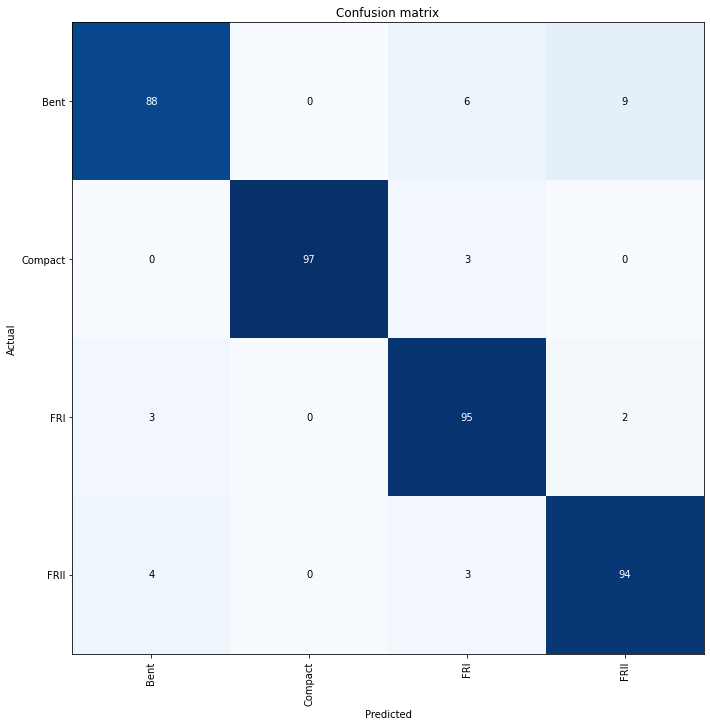

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
import glob

image_list = glob.glob('data-balanced/test/*/*')

Bent = 0
Pred_Bent=0
Compact=0
Pred_Compact=0
FRI=0
Pred_FRI=0
FRII=0
Pred_FRII = 0 

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    rg_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if rg_class == 'Bent':
        Bent += 1
        if pred_class == 'Bent':
            Pred_Bent += 1
            print(each[2:], pred_class)
        # else:
        #     print(each[2:], pred_class)
    elif rg_class == 'Compact':
        Compact += 1
        if pred_class == 'Compact':
            Pred_Compact += 1
            print(each[2:], pred_class)
        # else:
        #    print(each[2:], pred_class)
    elif rg_class == 'FRI':
        FRI += 1
        if pred_class == 'FRI':
            Pred_FRI += 1
            print(each[2:], pred_class)
        # else:
        #     print(each[2:], pred_class)
    elif rg_class == 'FRII':
        FRII += 1
        if pred_class == 'FRII':
            Pred_FRII += 1
            print(each[2:], pred_class)
        # else:
        #    print(each[2:], pred_class)

['Compact', 'J013426.53-081701.9.jpeg'] Compact
['Compact', 'J090130.14+553916.6.jpeg'] Compact
['Compact', 'J000001.58-092940.3.jpeg'] Compact
['Compact', 'J000027.89-010235.4.jpeg'] Compact
['Compact', 'J000140.36-010636.9.jpeg'] Compact
['Compact', 'J000134.96-085727.7.jpeg'] Compact
['Compact', 'J003055.39+001024.2.jpeg'] Compact
['Compact', 'J085651.78+214949.4.jpeg'] Compact
['Compact', 'J000400.88+001717.9.jpeg'] Compact
['Compact', 'J000140.21+010531.1.jpeg'] Compact
['Compact', 'J002235.86+003555.0.jpeg'] Compact
['Compact', 'J000325.23+004355.5.jpeg'] Compact
['Compact', 'J015301.50-010841.5.jpeg'] Compact
['Compact', 'J002331.60+010116.7.jpeg'] Compact
['Compact', 'J001503.37+003459.2.jpeg'] Compact
['Compact', 'J002833.42+005510.9.jpeg'] Compact
['Compact', 'J003230.91+002440.2.jpeg'] Compact
['Compact', 'J002351.21+000632.9.jpeg'] Compact
['Compact', 'J005805.37+002647.4.jpeg'] Compact
['Compact', 'J001511.48-011153.1.jpeg'] Compact
['Compact', 'J002142.25-090044.4.jpeg'] 

In [ ]:
print('TP Bent: ' + str(Pred_Bent) + '/' + str(Bent))
print('TP Compact: ' + str(Pred_Compact) + '/' + str(Compact))
print('TP FRI: ' + str(Pred_FRI) + '/' + str(FRI) )
print('TP FRII: ' + str(Pred_FRII) + '/' + str(FRII) )

TP Bent: 88/103
TP Compact: 97/100
TP FRI: 95/100
TP FRII: 94/101
